In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [19]:
from matplotlib import colors
def curve_color(x, y):
    """
    The color (RGB) on the curve at position (x, y) 
    """
    # assume return a color value between (0, 1)
    norm = colors.Normalize(vmin=0, vmax=1)
    mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
    return mapper.to_rgba(x)[:, :3]

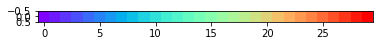

In [27]:
x = np.linspace(-1, 1, 30)
y = x
plt.imshow(curve_color(x, y).reshape(1, -1, 3), cmap='rainbow')

In [25]:
curve_color(x, y).shape

(30, 3)

In [17]:
mapper = cm.ScalarMappable(cmap='rainbow')

In [1]:
import torch

In [6]:
fov = torch.tensor([5, 10])
angle_min, angle_max = fov
angle = torch.linspace(angle_min, angle_max, angle_max - angle_min + 1)

In [16]:
[torch.cos(angle), torch.sin(angle)]

[tensor([ 0.2837,  0.9602,  0.7539, -0.1455, -0.9111, -0.8391]),
 tensor([-0.9589, -0.2794,  0.6570,  0.9894,  0.4121, -0.5440])]

In [25]:
dirs = torch.vstack([torch.cos(angle), torch.sin(angle)])

In [23]:
R = torch.eye(2)

In [26]:
dirs.shape

torch.Size([2, 6])

In [28]:
def get_dirs(fov):
    """[summary]

    Returns:
        [type]: [description]
    """    
    
    angle_min, angle_max = fov
    angle = torch.linspace(angle_min, angle_max, angle_max - angle_min + 1)
    return torch.vstack([torch.cos(angle), torch.sin(angle)])


def get_rays(fov, c2w):
    """
    Start from camera center, sample points from fov along certain depth distance,
    then transform the points to the world coordinates

    For the camera coordinates, y is pointing to the world center and x forms a 
    right-hand coordinates with y facing outward

    Args:
        fov (N, 2): [description]
        c2w (N, 3, 3): [description]
    
    Returns:
        rays_d (N, 2) direction rays
        rays_o (N, 2) origin of rays
    """
    
    # sample distance along each rays_d
    dirs = get_dirs(fov)

    R, t = c2w[:2, :2], c2w[:2, -1]
    rays_d = R @ dirs # (2, N)
    rays_o = t.expand(rays_d.shape)
    return rays_d.t(), rays_o.t()

In [ ]:
fov = torch.tensor([-1, 1])
c2w = torch.tensor([[0, -1, 0],
                    [1, 0, 1],
                    [0, 0, 0]])

In [25]:
import torch
import math
r = 3
theta = torch.linspace(0, 2 * math.pi, 360)
torch.stack([r * torch.cos(theta), r * torch.sin(theta)]).shape

torch.Size([2, 360])

In [27]:
mapper = cm.ScalarMappable(cmap='rainbow')

In [28]:
x = r * torch.cos(theta)
y = r * torch.sin(theta)
# x, y = x.numpy(), y.numpy()
color = mapper.to_rgba(x)[..., :3]

In [29]:
color[0]

array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17])

In [30]:
x.shape, color.shape

(torch.Size([360]), (360, 3))

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

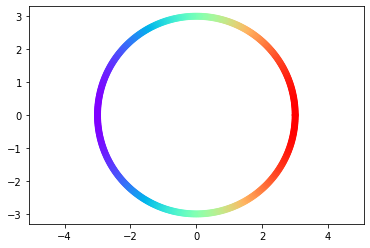

In [31]:
plt.scatter(x, y, c=color)
plt.axis('equal')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

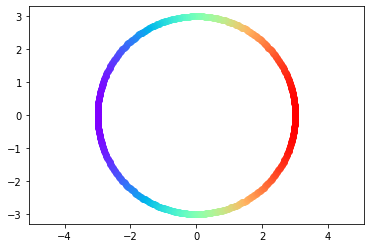

In [26]:
for i in range(len(x)):
    plt.scatter(x[i], y[i], c=color[i])
plt.axis('equal')

In [35]:
import torch
import math

from model import NeRF
from run_nerf import render_rays
from matplotlib import cm, colors
import matplotlib.pyplot as plt


def render_path_circle(model, cuda=True):
    """
    Sample points along the circle and render what is the view
    """
    r = 3
    theta = torch.linspace(0, 2 * math.pi, 360)
    x, y = r * torch.cos(theta), r * torch.sin(theta)
    rays_o = torch.stack([x, y]).t()
    rays_d = -theta
    view_dirs = rays_d
    if cuda:
        rays_o, rays_d, view_dirs = rays_o.cuda(), rays_d.cuda(), view_dirs.cuda()
    res = render_rays(rays_o, rays_d, view_dirs, model.forward)
    return x, y, res

def vis_res(x, y, pred):
    # norm = colors.Normalize(vmin=0, vmax=1)
    # mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
    color = pred #mapper.to_rgba(pred)[..., :3]
    plt.scatter(x, y, c=color)
    plt.axis('equal')
    plt.savefig('res.png', dpi=1000)

In [9]:
model = NeRF.load_from_checkpoint('lightning_logs/version_28_good/checkpoints/epoch=8-step=1412.ckpt')


In [10]:
model.cuda()
model.eval()
with torch.no_grad():
    x, y, res = render_path_circle(model)

In [33]:
res = res.cpu()

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

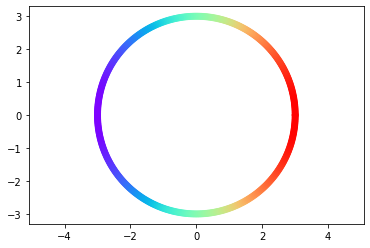

In [36]:
vis_res(x.numpy(), y.numpy(), res.numpy())
plt.axis('equal')

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

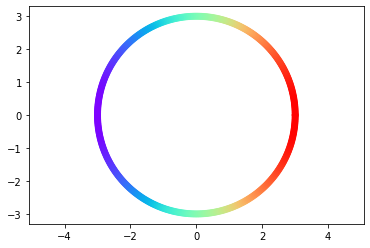

In [34]:
vis_res(x.numpy(), y.numpy(), res.numpy())
plt.axis('equal')

In [18]:
res.shape

torch.Size([360, 3])

In [22]:
x.shape

torch.Size([360])